# Convert Berkeley Earth Anomalies for Land Only to GAST + csv

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load temperature anomalies file

In [2]:
fname_in = '../data/Land-Only_GASTa_BerkeleyEarth_1750-2023.txt'

In [3]:
names = ['Year', 'Month', 'Monthly Anomaly', 'Monthly Anomaly Uncertainty', 
         'Annual Anomaly', 'Annual Anomaly Uncertainty',
         'Five-Year Anomaly', 'Five-Year Anomaly Uncertainty',
         'Ten-Year Anomaly', 'Ten-Year Anomaly Uncertainty',
         'Twenty-Year Anomaly', 'Twenty-Year Anomaly Uncertainty']

In [4]:
widths = [6, 6, 11, 6, 11, 7, 11, 6, 11, 6, 11, 6]

In [5]:
df = pd.read_fwf(fname_in, skiprows=35, widths=widths, header=None, names=names)

In [6]:
df

,Year,Month,Monthly Anomaly,Monthly Anomaly Uncertainty,Annual Anomaly,Annual Anomaly Uncertainty,Five-Year Anomaly,Five-Year Anomaly Uncertainty,Ten-Year Anomaly,Ten-Year Anomaly Uncertainty,Twenty-Year Anomaly,Twenty-Year Anomaly Uncertainty
0,1750,1,-0.847,4.137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1750,2,-1.326,3.059,-1.062,1.074,NaN,NaN,NaN,NaN,NaN,NaN
2,1750,3,-0.050,2.279,-1.096,1.091,NaN,NaN,NaN,NaN,NaN,NaN
3,1750,4,-0.397,2.110,-1.138,1.090,NaN,NaN,NaN,NaN,NaN,NaN
4,1750,5,-1.777,1.337,-1.459,1.098,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3283,2023,8,1.708,0.101,1.748,0.058,NaN,NaN,NaN,NaN,NaN,NaN
3284,2023,9,2.201,0.080,1.753,0.056,NaN,NaN,NaN,NaN,NaN,NaN
3285,2023,10,2.097,0.139,1.811,0.054,NaN,NaN,NaN,NaN,NaN,NaN
3286,2023,11,2.069,0.134,1.846,0.058,NaN,NaN,NaN,NaN,NaN,NaN


## Add global mean temp to anomalies
As Earth's land is not distributed symmetrically about the equator, there exists a mean seasonality to the global average temperature.

Using air temperature above sea ice:
 
<u>Estimated Jan 1951-Dec 1980 monthly absolute temperature:</u>

      Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec

     2.56  3.18  5.28  8.28 11.27 13.42 14.28 13.80 12.02  9.20  6.07  3.60
     0.15  0.14  0.13  0.13  0.13  0.14  0.14  0.14  0.14  0.13  0.13  0.15 (+/-)

In [7]:
c = {
    'Month' : np.arange(1,13),
    'Monthly Average' : [2.56, 3.18, 5.28, 8.28, 11.27, 13.42, 14.28, 13.80, 12.02, 9.20, 6.07, 3.60]
}

In [8]:
climM = pd.DataFrame(data=c)

In [9]:
df['Monthly Average'] = df.groupby('Month')['Monthly Anomaly'].transform(lambda x: x + climM.loc[climM['Month'] == x.name]['Monthly Average'].values[0])

In [10]:
df

,Year,Month,Monthly Anomaly,Monthly Anomaly Uncertainty,Annual Anomaly,Annual Anomaly Uncertainty,Five-Year Anomaly,Five-Year Anomaly Uncertainty,Ten-Year Anomaly,Ten-Year Anomaly Uncertainty,Twenty-Year Anomaly,Twenty-Year Anomaly Uncertainty,Monthly Average
0,1750,1,-0.847,4.137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.713
1,1750,2,-1.326,3.059,-1.062,1.074,NaN,NaN,NaN,NaN,NaN,NaN,1.854
2,1750,3,-0.050,2.279,-1.096,1.091,NaN,NaN,NaN,NaN,NaN,NaN,5.230
3,1750,4,-0.397,2.110,-1.138,1.090,NaN,NaN,NaN,NaN,NaN,NaN,7.883
4,1750,5,-1.777,1.337,-1.459,1.098,NaN,NaN,NaN,NaN,NaN,NaN,9.493
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,2023,8,1.708,0.101,1.748,0.058,NaN,NaN,NaN,NaN,NaN,NaN,15.508
3284,2023,9,2.201,0.080,1.753,0.056,NaN,NaN,NaN,NaN,NaN,NaN,14.221
3285,2023,10,2.097,0.139,1.811,0.054,NaN,NaN,NaN,NaN,NaN,NaN,11.297
3286,2023,11,2.069,0.134,1.846,0.058,NaN,NaN,NaN,NaN,NaN,NaN,8.139


<Axes: >

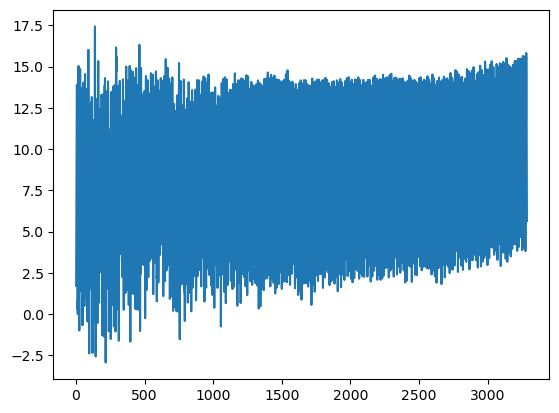

In [11]:
df['Monthly Average'].plot()

<Axes: xlabel='Month'>

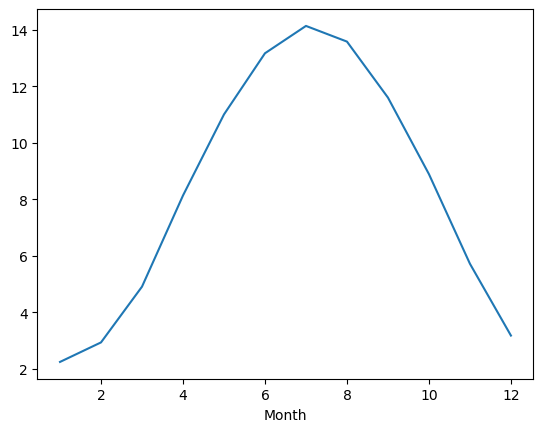

In [12]:
df['Monthly Average'].groupby(df['Month']).mean().plot()

## Write Monthly Averages to .csv

In [13]:
df_out = df[['Year','Month','Monthly Average','Monthly Anomaly Uncertainty']].copy()

In [14]:
df_out

,Year,Month,Monthly Average,Monthly Anomaly Uncertainty
0,1750,1,1.713,4.137
1,1750,2,1.854,3.059
2,1750,3,5.230,2.279
3,1750,4,7.883,2.110
4,1750,5,9.493,1.337
...,...,...,...,...
3283,2023,8,15.508,0.101
3284,2023,9,14.221,0.080
3285,2023,10,11.297,0.139
3286,2023,11,8.139,0.134


In [15]:
fname_out = '../data/Land-Only_GAST_BerkeleyEarth_1750-2023.csv'

In [16]:
# save output as csv
df_out.to_csv(fname_out, index=False)